In [25]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle

# Load the data 

In [26]:
x_train = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_train.npy") #*******
x_train= x_train//255


In [27]:
x_test = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test.npy")
x_test = x_test //255

In [28]:
x_test.min()

0

In [29]:
y_test = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_test2.npy") #*********
y_test.max()

1.0

In [30]:
y_test.min()

0.0

In [31]:
y_train = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\y_train2.npy") #********************

In [32]:
y_train.min()

0.0

In [33]:
y_train.max()

1.0

In [34]:
x_test2 = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\x_test2.npy")  #***********


In [35]:
x_test2.shape

(226, 128, 128, 2)

In [36]:
x_train.shape

(904, 128, 128, 1)

In [37]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 1


# DEFINE YOUR OWN MODEL

### EARLY STOPPING

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
earlystop= EarlyStopping(
    monitor="val_loss",
    patience=7)

In [42]:
callbacks = [earlystop]

In [43]:
BATCH_SIZE = 16
EPOCHS = 35

In [44]:
history = model.fit(x_train,y_train,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         steps_per_epoch = 766//BATCH_SIZE,
         validation_split = 0.15,
          callbacks = callbacks)

Epoch 1/35
47/47 [==============================] - 7s 94ms/step - loss: 0.2693 - accuracy: 0.9580 - val_loss: 0.1962 - val_accuracy: 0.9786
Epoch 2/35
47/47 [==============================] - 3s 68ms/step - loss: 0.0587 - accuracy: 0.9777 - val_loss: 0.0972 - val_accuracy: 0.9786
Epoch 3/35
47/47 [==============================] - 3s 68ms/step - loss: 0.0432 - accuracy: 0.9778 - val_loss: 0.0624 - val_accuracy: 0.9786
Epoch 4/35
47/47 [==============================] - 3s 69ms/step - loss: 0.0373 - accuracy: 0.9781 - val_loss: 0.0594 - val_accuracy: 0.9786
Epoch 5/35
47/47 [==============================] - 3s 69ms/step - loss: 0.0313 - accuracy: 0.9790 - val_loss: 0.0600 - val_accuracy: 0.9786
Epoch 6/35
47/47 [==============================] - 3s 69ms/step - loss: 0.0285 - accuracy: 0.9781 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 7/35
47/47 [==============================] - 3s 69ms/step - loss: 0.0248 - accuracy: 0.9798 - val_loss: 0.0688 - val_accuracy: 0.9786
Epoch 8/35
47

In [45]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 2s 131ms/step - loss: 0.0451 - accuracy: 0.9770


[0.04505622014403343, 0.9769775867462158]

In [ ]:
model.save("C:/Users/asus/Desktop/Stroke-Segmentation/stroke_model.h5")

(128, 128, 1)

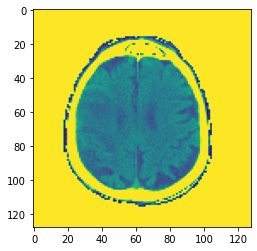

In [102]:
x_test_deneme = np.load(r"C:\Users\asus\Desktop\Stroke-Segmentation\graydata\deneme.npy")
plt.imshow(x_test_deneme[:,:,0])
x_test_deneme.shape

In [100]:
x_test[100].shape

(128, 128, 1)

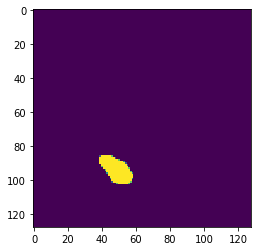

In [123]:
plt.imshow(y_test[5,:,:,0],interpolation = "nearest")


In [130]:
a = np.expand_dims(x_test[5],axis = 0)

In [131]:
a.shape

(1, 128, 128, 1)

In [132]:
#a.max()

In [133]:
a.min()

0

In [134]:
y_pred = model.predict(a)

In [139]:
o = y_pred[0,:,:,0]
o.shape
# o[o>0.5]=1
# o[o<0.5]=0

(128, 128)

In [140]:
o.shape

(128, 128)

In [141]:
a.shape

(1, 128, 128, 1)

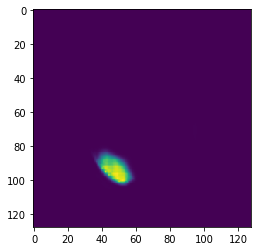

In [142]:
plt.imshow(o)

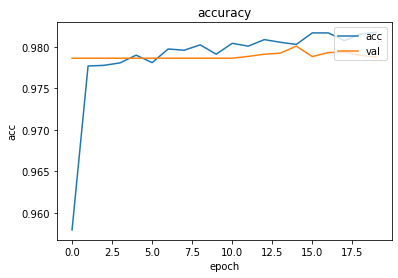

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper right')
plt.show()